# 배열의 형태(shape) 변경

## reshape()을 이용한 차원 변경
- `numpy.reshape(a, newshape)` 또는 `ndarray.reshape(newshape)`
    - a: 형태를 변경할 배열
    - newshape : 변경할 형태 설정. 
        - 원소의 개수를 유지하는 shape으로만 변환 가능하다.

## 차원 늘리기(확장)

### numpy.newaxis 이용해 차원 늘리기
- size가 1인 rank를 늘릴때 사용한다. 
    - 지정한 axis에 size 1인 축을 추가한다.
- slicing에 사용하거나 indexing에 `...`과 같이 사용한다.
    - slicing의 경우 원하는 위치의 축을 늘릴 수 있다.
    - index에 ...과 사용하는 경우 첫번째나 마지막 축을 늘릴때 사용한다.
    
### numpy.expand_dims (배열, axis)
- 매개변수로 받은 배열에 지정한 axis의 rank를 확장한다.

## 차원 줄이기(축소)

### numpy.squeeze(배열, axis=None), 배열객체.squeeze(axis=None)
- 배열에서 지정한 축(axis)을 제거하여 차원(rank)를 줄인다.
- 제거하려는 축의 size는 1이어야 한다.
- 축을 지정하지 않으면 size가 1인 모든 축을 제거한다.
    - (3,1,1,2) => (3,2)

### 배열객체.flatten()
- 다차원 배열을 1차원으로 만든다.

# 벡터 연산 - 벡터화(vectorization)
- 같은 형태(shape)의 배열(벡터, 행렬)간의 연산은 같은 index의 원소끼리 연산을 한다. 
    - **Element-wise(원소별) 연산** 이라고도 한다.
    - 배열간의 연산시 배열의 형태가 같아야 한다.
    - 배열의 형태가 다른 경우 Broadcast 조건을 만족하면 연산이 가능하다.

### 벡터/행렬과 스칼라간 연산

$$
\begin{align}
x=
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
10 - x = 10 -
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
=
\begin{bmatrix}
10 - 1 \\
10 - 2 \\
10 - 3 \\
\end{bmatrix}
=
\begin{bmatrix}
9 \\
8 \\
7 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
10 \times
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
=
\begin{bmatrix}
10\times1 & 10\times2 \\
10\times3 & 10\times4 \\
\end{bmatrix}
=
\begin{bmatrix}
10 & 20 \\
30 & 40
\end{bmatrix}
\end{align}
$$

### 벡터/행렬 간의 연산
$$
\begin{align}
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
+
\begin{bmatrix}
10 \\
20 \\
30 \\
\end{bmatrix}
=
\begin{bmatrix}
1 + 10 \\
2 + 20 \\
3 + 30 \\
\end{bmatrix}
=
\begin{bmatrix}
11 \\
22 \\
33 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
-
\begin{bmatrix}
10 \\
20 \\
30 \\
\end{bmatrix}
=
\begin{bmatrix}
1 - 10 \\
2 - 20 \\
3 - 30 \\
\end{bmatrix}
=
\begin{bmatrix}
-9 \\
-18 \\
-27 \\
\end{bmatrix}
\end{align}
$$

$$
\begin{align}
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
+
\begin{bmatrix}
10 & 20 \\
30 & 40 \\
\end{bmatrix}
=
\begin{bmatrix}
1+10 & 2+20 \\
3+30 & 4+40
\end{bmatrix}
\end{align}
$$

## 내적 (Dot product)
- `@` 연산자 또는 `numpy.dot(벡터/행렬, 벡터/행렬)`  함수 사용
- ### 벡터간의 내적
    - 같은 index의 원소끼리 곱한뒤 결과를 모두 더한다.
    - 벡터간의 내적의 결과는 스칼라가 된다.
    - $ x \cdot y $ 또는 $x^T y$로 표현
    - 조건
        - 두 벡터의 차원(원소의개수)가 같아야 한다.
        - 앞의 벡터는 행벡터 뒤의 벡터는 열벡터 이어야 한다.
            - numpy 에서는 vector 끼리 연산시 앞의 벡터는 행벡터로 뒤의 벡터는 열벡터로 인식해 처리한다.

$$
\begin{align}
x =
\begin{bmatrix}
1 \\ 2 \\ 3 \\
\end{bmatrix}
,\;\;\;
y = 
\begin{bmatrix}
4 \\ 5 \\ 6 \\
\end{bmatrix} 
\end{align}
$$

$$
\begin{align}
x^T y = 
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\begin{bmatrix}
4 \\ 5 \\ 6 \\
\end{bmatrix} 
= 1 \times 4 + 2 \times 5 + 3 \times 6 = 32
\end{align}
$$

### 행렬간의 내적
- 앞 행렬의 행과 뒤 행렬의 열간에 내적을 한다.
- 행렬과 행렬을 내적하면 그 결과는 행렬이 된다.
- 앞 행렬의 열수와 뒤 행렬의 행수가 같아야 한다.
- 내적의 결과의 형태(shape)는 앞행렬의 행수와 뒤 행렬의 열의 형태를 가진다.
    - (3 x 2)와 (2 x 5) = (3 x 5)
    - (1 x 5)와 (5 x 1) = (5 x 5)    

$$
\begin{align}
A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}
\end{align}
$$

$$
\begin{align}
B = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix}
\end{align}
$$

$$
\begin{align}
A\cdot B = \begin{bmatrix} 1\times 1 + 2\times 3 + 3 \times 5 & 1\times 2 + 2\times 4 + 3 \times 6  \\ 4\times 1 + 5\times 3 + 6 \times 5  & 4\times 2 + 5\times 4 + 6 \times 6  \end{bmatrix} = 
\begin{bmatrix} 22 & 28 \\ 49 & 64 \end{bmatrix}
\end{align}
$$

### 내적의 예
#### 가중합 
가격: 사과 2000, 귤 1000, 수박 10000    
개수: 사과 10, 귤 20, 수박 2    
총가격?    
2000*10 + 1000 * 20 + 10000 * 2

### 내적의 예
x(집의 특징) : 면적(평), 방개수, 범죄발생건수    
y: 집의 가격
```
집의 가격 = 1000*면적 + 500*방개수 + (-200)*범죄발생건수

=> 1000: 면적이 집가격에 얼마나 영향을 주는지 -> 1평이 증가하면 집의 가격이 1000(만원) 증가한다.
=> 500: 방이 1개 증가하면 가격이 500만원 증가한다.
=> 범죄발생건수가 1건 증가하면 200만원 감소한다.
각 값의 가중치가 된다. 
가중치와 집의 특징을 이용해 집값을 계산할 때 행렬곱으로 표현할 수 있다.
```
$$
가중치 = w\\
집의 특징 = x\\
w\cdot x
$$

## 기술통계함수
- 통계 결과를 계산해 주는 함수들
- 구문
    1. `np.전용함수(배열)`
        - np.sum(x)
    2. 일부는 `배열.전용함수()` 구문 지원
        - x.sum()
- 배열의 원소 중 누락된 값(NaN - Not a Number) 있을 경우 연산의 결과는 NaN으로 나온다.        
- 안전모드 함수
    - 배열내 누락된 값(NaN)을 무시하고 계산
        
- https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.statistics.html

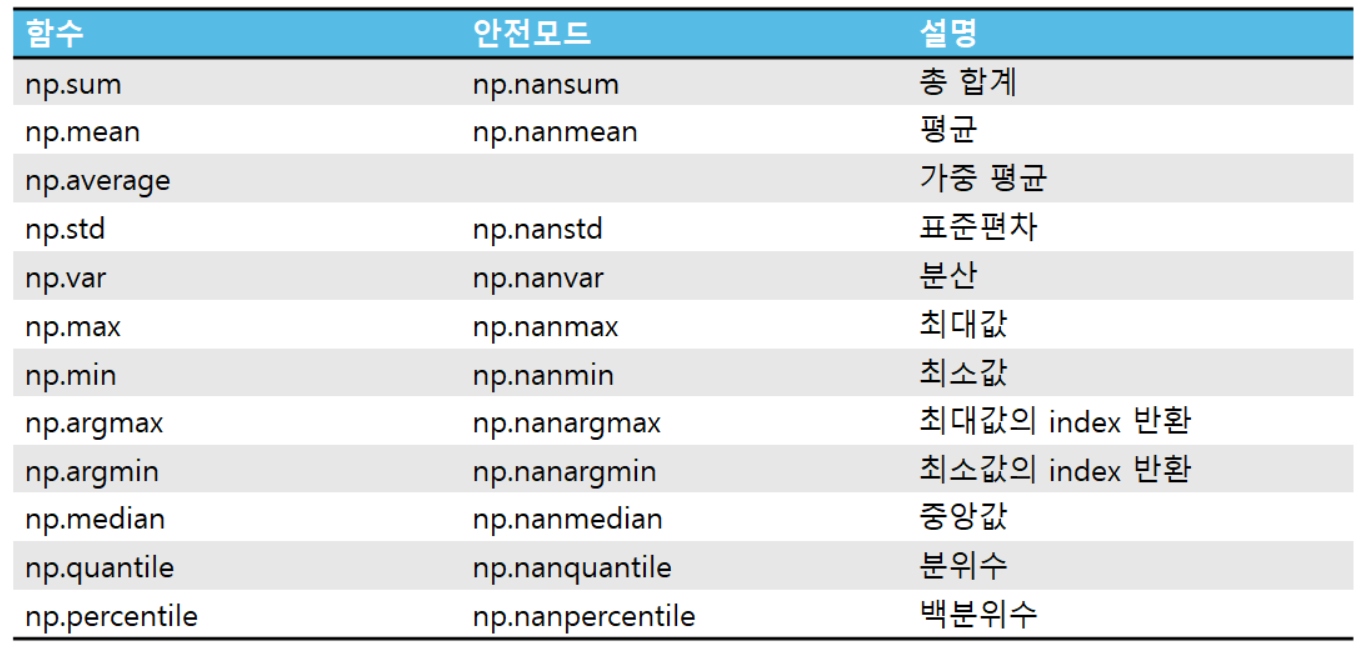

# 브로드 캐스팅
- 사전적의미 : 퍼트린다. 전파한다. 
- 형태(shape)가 다른 배열 연산시 배열의 형태를 맞춰 연산이 가능하도록 한다.
    - 모든 형태를 다 맞추는 것은 아니고 조건이 맞아야 한다.
- 조건
    1. 두 배열의 축의 개수가 다르면 작은 축의개수를 가진 배열의 형태(shape)의 앞쪽을 1로 채운다.
        - (2, 3)  + (3, ) => (2, 3) + (1, 3)
    2. 두 배열의 차원 수가 같지만 각 차원의 크기가 다른 경우 어느 한 쪽에 1이 있으면 그 1이 다른 배열의 크기와 일치하도록 늘어난다.
         - 1 이외의 나머지 축의 크기는 같아야 한다.
         - 늘리면서 원소는 복사한다.
         - (2, 3) + (1, 3) => (2, 3)+(2, 3)

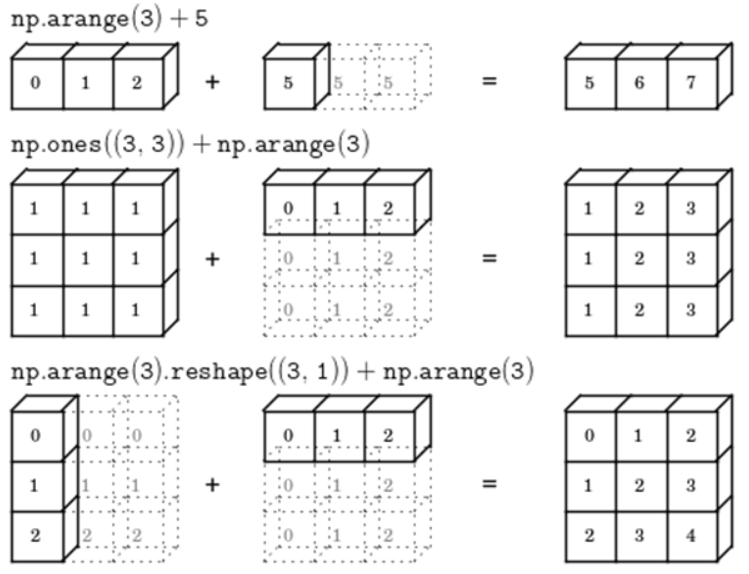